**Group Project 6 a**

1. Extract and match interst points from a pair of images using the SIFT detector and descriptor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/CS408/SIFT')

Mounted at /content/drive


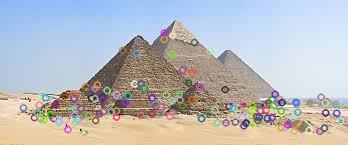

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

# Load the image
img = cv2.imread('1.jpg')

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect and compute keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints on the image
img = cv2.drawKeypoints(img, keypoints, img)

# Display the image using cv2_imshow
cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

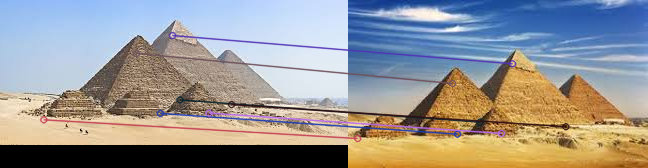

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab

# Load images
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('4.jpg')

# Create SIFT object
sift = cv2.SIFT_create()

# Detect and compute keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)
# Create a BFMatcher object
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# Draw matches
img3 = cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Use cv2_imshow to display the image in Colab
cv2_imshow(img3) # Replace cv2.imshow with cv2_imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# prompt: how many points dos it have matches

print(len(good))


7


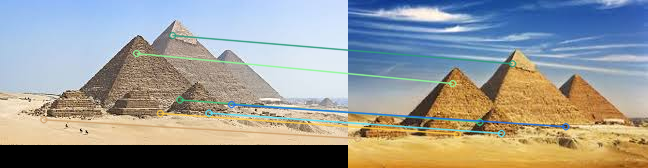

7


In [ ]:
# prompt: get matching for another pyramid image

# Load images
img1 = cv2.imread('1.jpg')
img3 = cv2.imread('4.jpg')

# Create SIFT object
sift = cv2.SIFT_create()

# Detect and compute keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints3, descriptors3 = sift.detectAndCompute(img3, None)

# Create a BFMatcher object
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors3, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# Draw matches
img4 = cv2.drawMatchesKnn(img1, keypoints1, img3, keypoints3, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Use cv2_imshow to display the image in Colab
cv2_imshow(img4) # Replace cv2.imshow with cv2_imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

print(len(good))


Change the distance <9

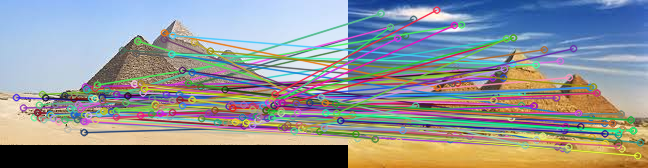

166


In [ ]:
# Load images
img4 = cv2.imread('1.jpg')
img5 = cv2.imread('4.jpg')

# Create SIFT object
sift = cv2.SIFT_create()

# Detect and compute keypoints and descriptors
keypoints4, descriptors4 = sift.detectAndCompute(img4, None)
keypoints5, descriptors5 = sift.detectAndCompute(img5, None)

# Create a BFMatcher object
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors4, descriptors5, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 9 * n.distance:
        good.append([m])

# Draw matches
img6 = cv2.drawMatchesKnn(img4, keypoints4, img5, keypoints5, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Use cv2_imshow to display the image in Colab
cv2_imshow(img6) # Replace cv2.imshow with cv2_imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

print(len(good))

Change the distance < 0.7

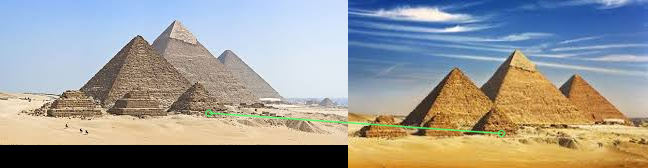

1


In [ ]:
# Load images
img4 = cv2.imread('1.jpg')
img5 = cv2.imread('4.jpg')

# Create SIFT object
sift = cv2.SIFT_create()

# Detect and compute keypoints and descriptors
keypoints4, descriptors4 = sift.detectAndCompute(img4, None)
keypoints5, descriptors5 = sift.detectAndCompute(img5, None)

# Create a BFMatcher object
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors4, descriptors5, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append([m])

# Draw matches
img6 = cv2.drawMatchesKnn(img4, keypoints4, img5, keypoints5, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Use cv2_imshow to display the image in Colab
cv2_imshow(img6) # Replace cv2.imshow with cv2_imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

print(len(good))

Using the harris corner method on same images

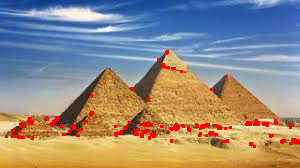

In [ ]:
# prompt: opencv implemntation of harris corner detection

import numpy as np
# Load image
img = cv2.imread('pyramid_1.bmp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to floating point for calculations
gray = np.float32(gray)

# Apply Harris corner detection
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate to mark the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.09 * dst.max()] = [0, 0, 255]  # Mark corners in red

# Display the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


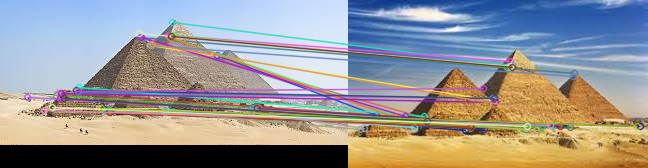

In [ ]:
# prompt: i want to match interset points of two images using harris corrner point detection and descripter

import cv2
import numpy as np

# Load images
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('4.jpg')


# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect Harris corners
corners1 = cv2.cornerHarris(np.float32(gray1), 5, 5, 0.04)
corners2 = cv2.cornerHarris(np.float32(gray2), 5, 5, 0.04)

# Dilate to mark corners
corners1 = cv2.dilate(corners1, None)
corners2 = cv2.dilate(corners2, None)

# Threshold to identify strong corners
threshold = 0.09
keypoints1 = np.argwhere(corners1 > threshold * corners1.max())
keypoints2 = np.argwhere(corners2 > threshold * corners2.max())

# Convert keypoints to KeyPoint objects for OpenCV
# Convert the coordinates to float
keypoints1 = [cv2.KeyPoint(float(x[1]), float(x[0]), 1) for x in keypoints1]
keypoints2 = [cv2.KeyPoint(float(x[1]), float(x[0]), 1) for x in keypoints2]

# Compute descriptors (using ORB as an example)
orb = cv2.ORB_create()
_, descriptors1 = orb.compute(img1, keypoints1)
_, descriptors2 = orb.compute(img2, keypoints2)

# Match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=2)

# Display matches
cv2_imshow(img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# prompt: how many matchinig points

print(len(matches))


55


3.Compare the result of SIFT and harris for different parameters

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detector(img, block_size_list):
    results = []
    for block_size in block_size_list:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray, block_size, ksize=3, k=0.04) # Use block_size instead of blockSize
        dst = cv2.dilate(dst, None)
        img[dst > 0.01 * dst.max()] = [0, 0, 255]
        corner_count = np.sum(dst > 0.01 * dst.max())
        results.append(corner_count)
    return results

# Load image
img = cv2.imread('pyramid_1.bmp')

# Define block sizes
block_sizes = [3, 5, 7, 9]

# Detect corners and count
corner_counts = harris_corner_detector(img, block_sizes)

# Plot the results
plt.plot(block_sizes, corner_counts, marker='o')
plt.xlabel('Block Size')
plt.ylabel('Number of Corners')
plt.title('Harris Corner Detector - Block Size vs Corner Count')
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


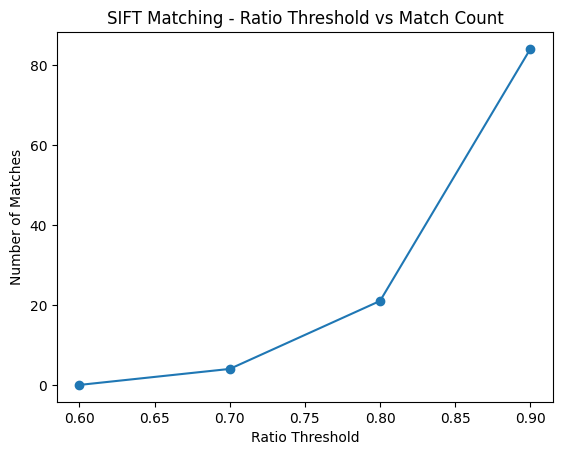

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sift_matching(img1, img2, ratio_list):
    results = []
    for ratio in ratio_list:
        # Create SIFT object
        sift = cv2.SIFT_create()

        # Detect and compute keypoints and descriptors
        kp1, des1 = sift.detectAndCompute(img1, None)
        kp2, des2 = sift.detectAndCompute(img2, None)

        # Create BFMatcher object
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)

        # Apply ratio test
        good = []
        for m, n in matches:
            if m.distance < ratio * n.distance:
                good.append([m])

        results.append(len(good))
    return results

# Load images
img1 = cv2.imread('pyramid_1.bmp')
img2 = cv2.imread('pyramid_2.bmp')

# Define ratio thresholds
ratios = [0.6, 0.7, 0.8, 0.9]

# Perform matching and count
match_counts = sift_matching(img1, img2, ratios)

# Plot the results
plt.plot(ratios, match_counts, marker='o')
plt.xlabel('Ratio Threshold')
plt.ylabel('Number of Matches')
plt.title('SIFT Matching - Ratio Threshold vs Match Count')
plt.show()

In [ ]:
# prompt: get the bset threshold value for the images

def sift_matching_best_threshold(img1, img2, ratio_list):
    best_ratio = None
    max_matches = 0
    for ratio in ratio_list:
        # Create SIFT object
        sift = cv2.SIFT_create()

        # Detect and compute keypoints and descriptors
        kp1, des1 = sift.detectAndCompute(img1, None)
        kp2, des2 = sift.detectAndCompute(img2, None)

        # Create BFMatcher object
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)

        # Apply ratio test
        good = []
        for m, n in matches:
            if m.distance < ratio * n.distance:
                good.append([m])

        if len(good) > max_matches:
            max_matches = len(good)
            best_ratio = ratio
    return best_ratio, max_matches

# Load images
img1 = cv2.imread('pyramid_1.bmp')
img2 = cv2.imread('pyramid_2.bmp')

# Define ratio thresholds
ratios = [0.6, 0.7, 0.8, 0.9]

# Find best threshold
best_ratio, max_matches = sift_matching_best_threshold(img1, img2, ratios)

print("Best Ratio Threshold:", best_ratio)
print("Number of Matches at Best Threshold:", max_matches)


Best Ratio Threshold: 0.9
Number of Matches at Best Threshold: 84


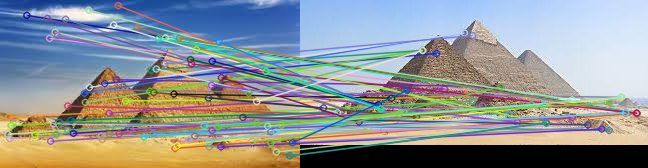

In [ ]:
# prompt: now genrate those match in images

# ... (preceding code)

# Generate matches for the best ratio
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < best_ratio * n.distance:
        good.append([m])

# Draw matches for the best ratio
img_matches_best = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matches for the best ratio
cv2_imshow(img_matches_best)
cv2.waitKey(0)
cv2.destroyAllWindows()


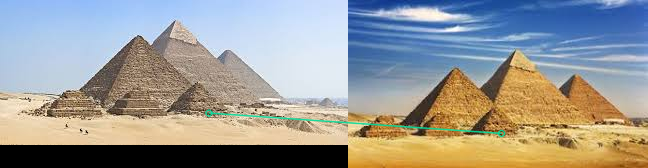

In [ ]:
# prompt: now genrate those match in images

# ... (preceding code)

# Generate matches for the best ratio
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append([m])

# Draw matches for the best ratio
img_matches_best = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matches for the best ratio
cv2_imshow(img_matches_best)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Use cv2_imshow for Colab

# Load images
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('4.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 1. Harris Corner Detection
def harris_corner_detection(image, window_size=3, k=0.04, threshold=0.01):
    gray = np.float32(image)
    dst = cv2.cornerHarris(gray, blockSize=window_size, ksize=3, k=k)

    # Threshold for an optimal value, marking the corners
    img_harris = image.copy()
    img_harris[dst > threshold * dst.max()] = [0, 0, 255]  # Mark corners in red

    return img_harris, dst

# Example Harris corner detection with different window sizes
harris_img1, _ = harris_corner_detection(gray1, window_size=3)
harris_img2, _ = harris_corner_detection(gray2, window_size=3)

# 2. SIFT Detection and Matching
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Use BFMatcher for matching
bf = cv2.BFMatcher()

# Define a function to perform matching with different ratio thresholds
def sift_matching(ratio):
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test
    good = []
    for m, n in matches:
        if m.distance < ratio * n.distance:
            good.append([m])

    # Draw matches
    img_matches = cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good, None,
                                     flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return img_matches

# Example SIFT matching with different ratio thresholds
sift_img_matches_strict = sift_matching(ratio=0.6)  # Stricter matching
sift_img_matches_loose = sift_matching(ratio=0.8)   # Looser matching

# Display Results
cv2_imshow(harris_img1)
cv2_imshow(sift_img_matches_strict)
cv2_imshow(sift_img_matches_loose)


ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 2699 output values where the mask is true